In [4]:
import pandas as pd

# Load the Excel file
xls = pd.ExcelFile("Bank_Personal_Loan_Modelling.xlsx")

# Check sheet names
print(xls.sheet_names)

# Load the sheets
description_df = xls.parse('Description')
data_df = xls.parse('Data')

# Display first few rows
print(description_df.head())
print(data_df.head())

['Description', 'Data']
   Unnamed: 0         Unnamed: 1 Unnamed: 2
0         NaN                NaN        NaN
1         NaN                NaN        NaN
2         NaN                NaN        NaN
3         NaN                NaN        NaN
4         NaN  Data Description:        NaN
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0  

##Explore the Data##

In [5]:
data_df.info()
data_df.describe()
data_df.isnull().sum()
data_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

##Basic EDA – Target Variable##

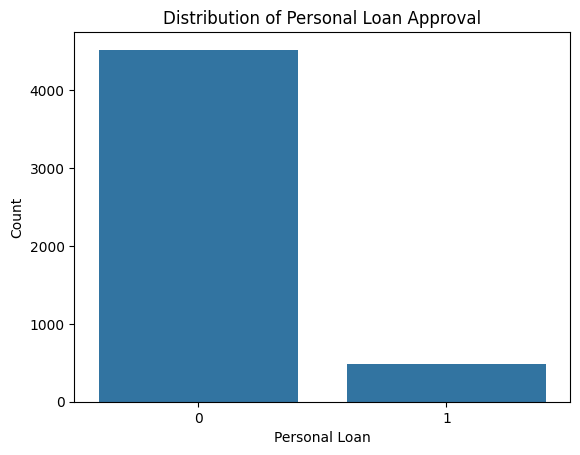

Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data_df, x='Personal Loan')
plt.title("Distribution of Personal Loan Approval")
plt.xlabel("Personal Loan")
plt.ylabel("Count")
plt.show()

data_df['Personal Loan'].value_counts(normalize=True)


##Visualize Relationships##

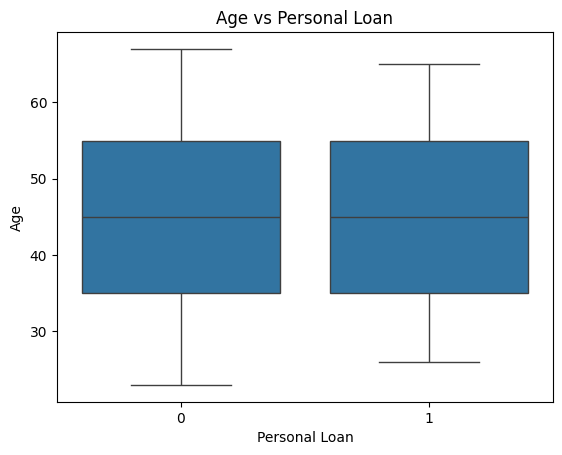

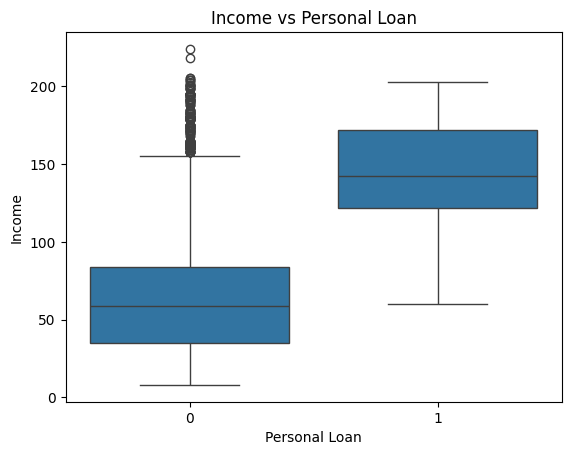

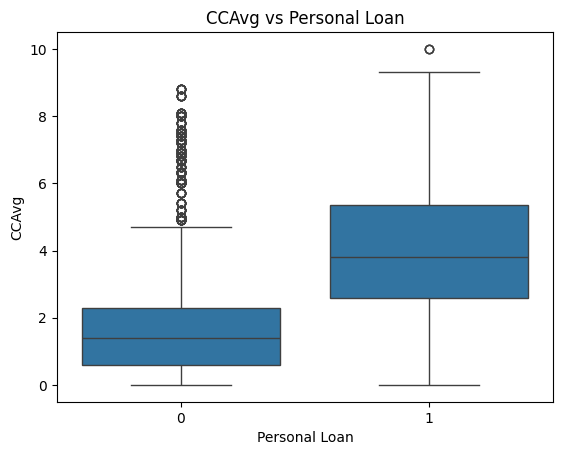

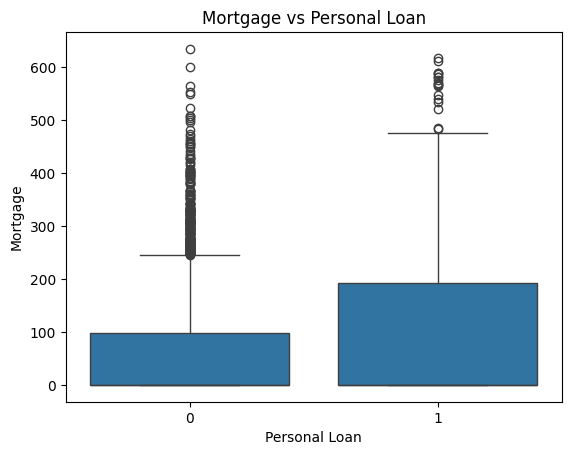

In [8]:
# numerical features
# Numerical features
numerical_cols = ['Age', 'Income', 'CCAvg', 'Mortgage']
for col in numerical_cols:
    sns.boxplot(x='Personal Loan', y=col, data=data_df)
    plt.title(f'{col} vs Personal Loan')
    plt.show()


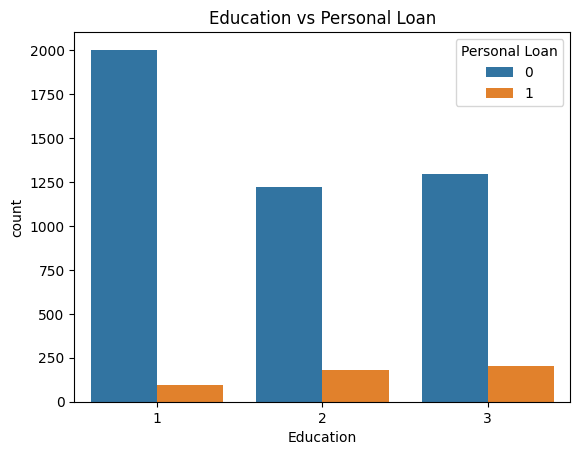

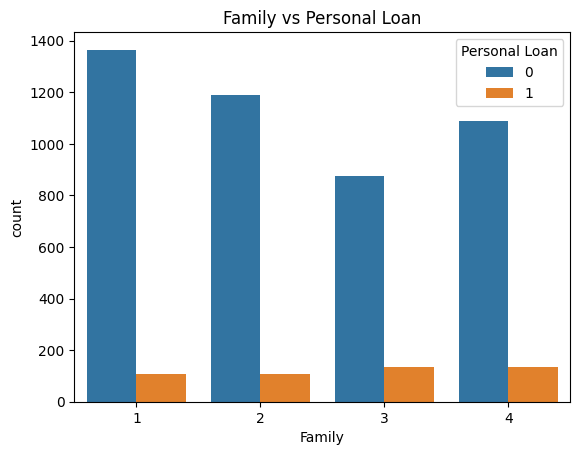

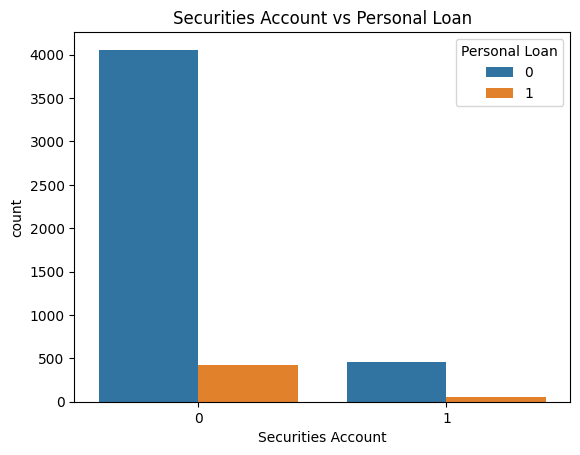

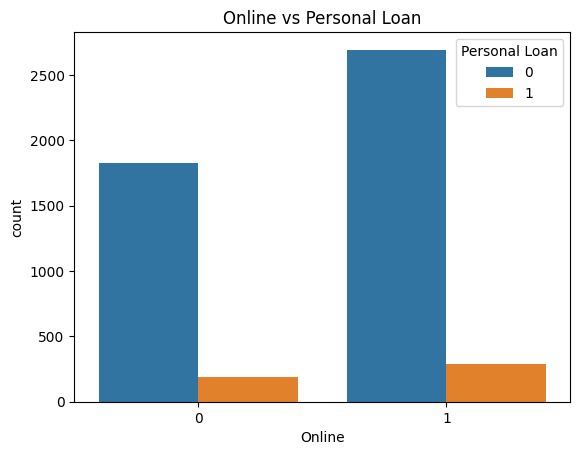

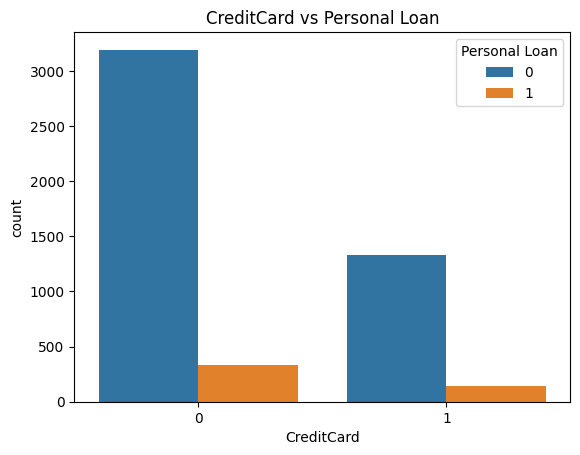

In [9]:
# Categorical features
categorical_cols = ['Education', 'Family', 'Securities Account', 'Online', 'CreditCard']
for col in categorical_cols:
    sns.countplot(x=col, hue='Personal Loan', data=data_df)
    plt.title(f'{col} vs Personal Loan')
    plt.show()


##data cleaning##

In [10]:
# Check duplicates
data_df.duplicated().sum()

np.int64(0)

## Correlation Analysis ##

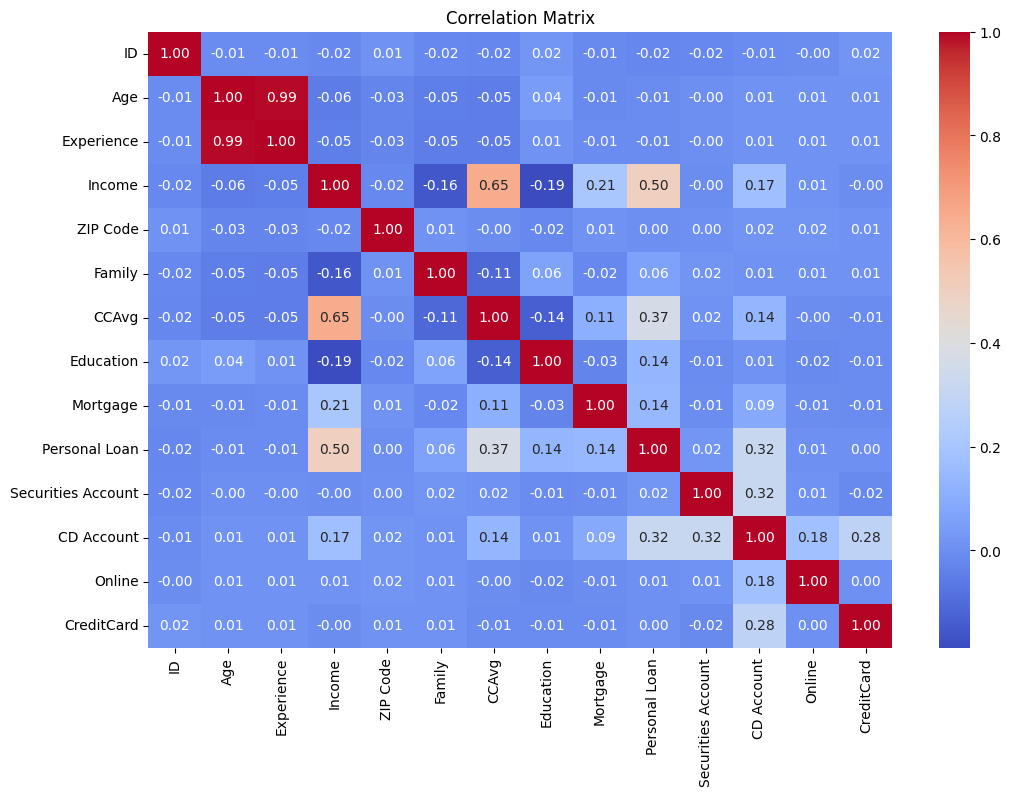

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data_df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


 Income → 0.50 — strong positive correlation

🔹 CD Account → 0.32 — moderately positive

🔹 CCAvg → 0.37 — moderate correlation

🔹 Securities Account → 0.21

🔹 Family → 0.14

## Feature Engineering ##

In [12]:
from sklearn.model_selection import train_test_split

# Drop unnecessary columns
data_model = data_df.drop(['ID', 'ZIP Code'], axis=1)

# Define target and features
X = data_model.drop('Personal Loan', axis=1)
y = data_model['Personal Loan']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (3500, 11)
Testing set shape: (1500, 11)


## Model Building ##

## Logistic Regression ##

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=2000))  # Increased iterations
])

pipeline.fit(X_train, y_train)
y_pred_scaled = pipeline.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_scaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_scaled))


Confusion Matrix:
 [[1324   19]
 [  53  104]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.85      0.66      0.74       157

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.86      1500
weighted avg       0.95      0.95      0.95      1500



## Decision Tree Classifier ##

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))


Confusion Matrix:
 [[1331   12]
 [  18  139]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.92      0.89      0.90       157

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



## random forest ##

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest
Confusion Matrix:
 [[1342    1]
 [  15  142]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1343
           1       0.99      0.90      0.95       157

    accuracy                           0.99      1500
   macro avg       0.99      0.95      0.97      1500
weighted avg       0.99      0.99      0.99      1500



## plot ##

/var/folders/w0/gzl72q_50mbf77nryh92smw80000gn/T/ipykernel_22370/1972506983.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importances, palette='viridis')


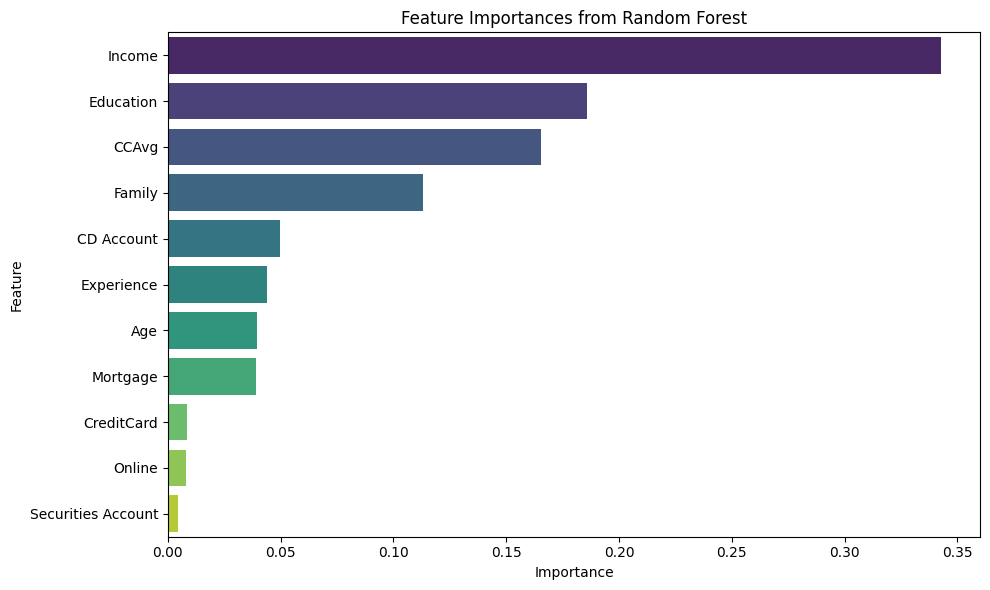

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained RF model
importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame for easy plotting
feat_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importances, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()


📊 Model Performance Comparison

| Model                | Accuracy | Precision | Recall | F1-score |
|---------------------|----------|-----------|--------|----------|
| Logistic Regression | 0.95     | 0.85      | 0.66   | 0.74     |
| Decision Tree       | 0.98     | 0.92      | 0.89   | 0.90     |
| Random Forest       | 0.98     | 0.93      | 0.88   | 0.90     |

##Final Conclusion & Recommendation##
After evaluating three machine learning models—Logistic Regression, Decision Tree, and Random Forest—the Random Forest classifier has emerged as the best-performing model for predicting Personal Loan Acceptance.

🔍 Key Performance Summary:
Accuracy: 99%

Precision (Class 1 - Loan Accepted): 0.99

Recall (Class 1): 0.90

F1-Score (Class 1): 0.95

🏆 Why Random Forest?
It shows the highest accuracy and balanced performance across both classes.

Effectively handles nonlinear patterns and feature interactions.

Less prone to overfitting compared to a single decision tree.

📌 Recommendation:
Use the Random Forest model in production for personal loan approval prediction tasks. It provides high reliability and generalization, making it suitable for real-world banking use cases.

⭐ Top Influential Features:
Income

Education

CCAvg (Credit Card Average Spending)

Family

CD Account

